# Introduction aux Réseaux de Neurones

Bienvenue dans cette session dédiée à l'apprentissage des réseaux de neurones ! Ce notebook a pour objectif de vous introduire aux concepts fondamentaux des réseaux de neurones artificiels en utilisant Python et Keras. Nous utiliserons le célèbre dataset MNIST, qui contient des images de chiffres manuscrits, pour illustrer ces concepts.

## 1. Préparation de l'Environnement

Avant de commencer, nous devons importer les bibliothèques nécessaires. Ces bibliothèques nous permettront de manipuler les données, de construire notre modèle et de visualiser les résultats.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

Observation : Nous importons numpy pour les calculs numériques, matplotlib pour la visualisation, et Keras (de TensorFlow) pour construire et entraîner notre réseau de neurones.

## 2. Chargement et Préparation du Dataset MNIST

Le dataset MNIST est un ensemble de données de référence en apprentissage automatique. Il est composé de 70 000 images de chiffres manuscrits (60 000 pour l'entraînement et 10 000 pour les tests), chaque image étant en niveaux de gris de 28x28 pixels.

In [2]:
# Chargement des données
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


X_train et X_test contiennent les images, tandis que y_train et y_test contiennent les labels correspondants (les chiffres de 0 à 9).

In [3]:
print("Dimensions de X_train :", X_train.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de X_test :", X_test.shape)
print("Dimensions de y_test :", y_test.shape)

Dimensions de X_train : (60000, 28, 28)
Dimensions de y_train : (60000,)
Dimensions de X_test : (10000, 28, 28)
Dimensions de y_test : (10000,)


Observation : Nous pouvons voir que X_train contient 60 000 images de 28x28 pixels, et X_test contient 10 000 images de 28x28 pixels.

**Normalisation des Images**

Pour faciliter l'apprentissage du modèle, nous normalisons les valeurs des pixels entre 0 et 1.

In [4]:
# Normalisation des images
X_train = X_train / 255.0
X_test = X_test / 255.0

Observation : Les valeurs initiales des pixels sont entre 0 et 255. En divisant par 255, nous les ramenons entre 0 et 1.

**Conversion des Labels en One-Hot Encoding**

Nous convertissons les labels en vecteurs one-hot pour la classification multiclasse.

In [5]:
# Conversion des labels en format one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Observation : Un label tel que '3' devient un vecteur [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

## 3. Visualisation des Données
Avant de construire notre modèle, il est important de visualiser les données pour mieux les comprendre.

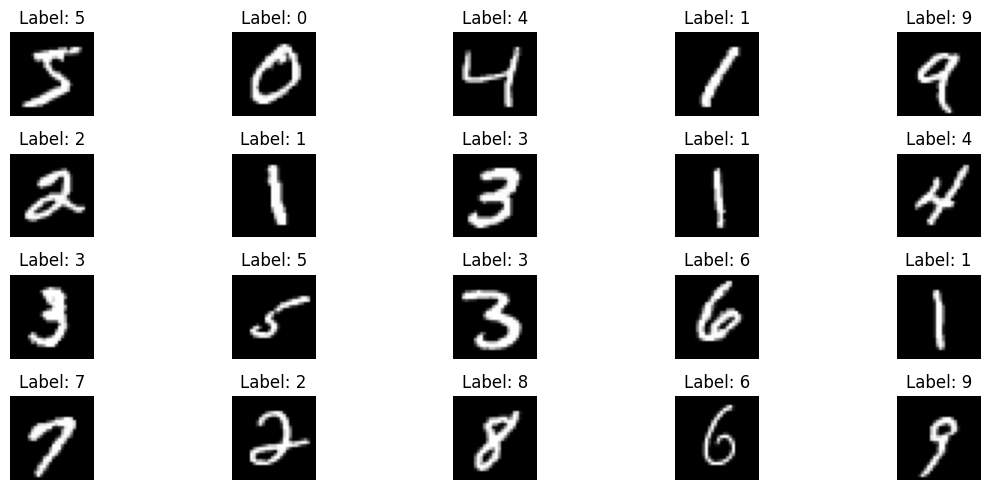

In [6]:
plt.figure(figsize=(12,5))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title('Label: %d' % np.argmax(y_train[i]))
    plt.axis('off')
plt.tight_layout()
plt.show()

Nous affichons 20 images du dataset d'entraînement avec leurs labels correspondants. Cela nous donne une idée de la variabilité des chiffres manuscrits.

## 4. Comprendre le Forward Pass
Le forward pass est le processus par lequel les entrées traversent le réseau de neurones pour produire une sortie. Chaque neurone effectue une opération mathématique simple :

$$
\text{Sortie} = \mathit{Activation}\left(\sum_{i} (\mathit{Poids}_i \times \mathit{Entrée}_i) + \mathit{Biais}\right)
$$


- Entrée_i : la i-ème entrée du neurone.
- Poids_i : le poids associé à la i-ème entrée.
- Biais : une constante ajoutée pour décaler la fonction d'activation.
- Activation : fonction non linéaire appliquée à la somme pondérée.

**Exemple Numérique Simple**

Pour mieux comprendre, prenons un exemple simple avec un neurone ayant deux entrées.

In [7]:
# Entrées du neurone
inputs = np.array([0.5, 0.3])

# Poids associés aux entrées
weights = np.array([0.8, -0.6])

# Biais du neurone
bias = 0.1

# Calcul de la somme pondérée
weighted_sum = np.dot(inputs, weights) + bias
print("Somme pondérée :", weighted_sum)

# Appliquer une fonction d'activation (ReLU)
activated_output = np.maximum(0, weighted_sum)
print("Sortie après activation ReLU :", activated_output)

Somme pondérée : 0.32000000000000006
Sortie après activation ReLU : 0.32000000000000006


**Explication :**

- Somme pondérée : Nous calculons la somme des produits des entrées par leurs poids et ajoutons le biais.
- Activation ReLU : La fonction ReLU (Rectified Linear Unit) renvoie 0 si l'entrée est négative, sinon elle renvoie l'entrée elle-même.

**Observation** : Cet exemple illustre comment un neurone traite ses entrées pour produire une sortie. Le biais et la fonction d'activation jouent des rôles cruciaux dans ce processus.

## 5. Importance du Biais
Le biais est un paramètre supplémentaire dans un neurone qui permet de décaler la fonction d'activation. Il est essentiel pour modéliser des données qui ne passent pas par l'origine (0,0).

**Illustration avec et sans Biais**

Pour démontrer l'importance du biais, considérons une relation linéaire simple.

**Génération de Données Simples**

In [8]:
# Générer des données linéaires simples
X_simple = np.linspace(-1, 1, 100)
Y_simple = 2 * X_simple + 0.5  # Relation linéaire avec biais 0.5

# Ajouter un peu de bruit
noise = np.random.normal(0, 0.05, X_simple.shape)
Y_simple_noisy = Y_simple + noise

Observation : Nous créons des données qui suivent une relation linéaire
𝑦 = 2 𝑥 + 0.5
avec un peu de bruit.

In [9]:
# Modèle linéaire sans biais
model_no_bias = Sequential([Dense(1, input_dim=1, use_bias=False)])
model_no_bias.compile(optimizer='sgd', loss='mse')
history_no_bias = model_no_bias.fit(X_simple, Y_simple_noisy, epochs=50, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Modèle linéaire avec biais
model_with_bias = Sequential([Dense(1, input_dim=1, use_bias=True)])
model_with_bias.compile(optimizer='sgd', loss='mse')
history_with_bias = model_with_bias.fit(X_simple, Y_simple_noisy, epochs=50, verbose=0)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


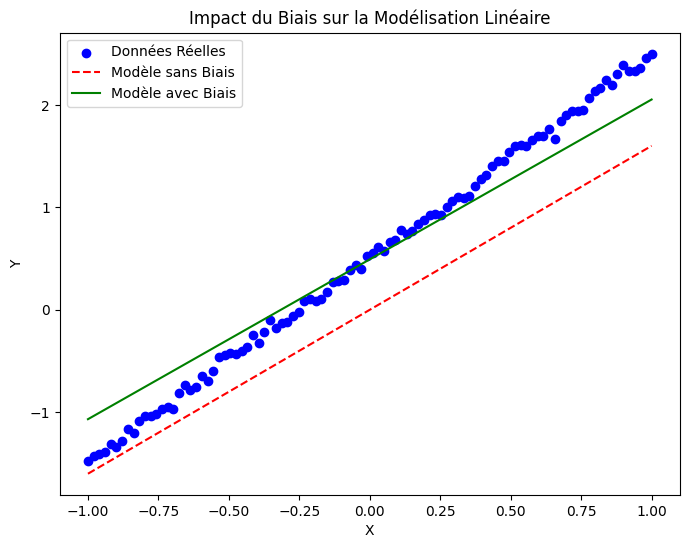

In [11]:
# Prédictions
Y_pred_no_bias = model_no_bias.predict(X_simple)
Y_pred_with_bias = model_with_bias.predict(X_simple)

# Visualisation
plt.figure(figsize=(8,6))
plt.scatter(X_simple, Y_simple_noisy, label='Données Réelles', color='blue')
plt.plot(X_simple, Y_pred_no_bias, 'r--', label='Modèle sans Biais')
plt.plot(X_simple, Y_pred_with_bias, 'g-', label='Modèle avec Biais')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Impact du Biais sur la Modélisation Linéaire')
plt.legend()
plt.show()

Observation : Le modèle avec biais s'ajuste mieux aux données que le modèle sans biais. Sans biais, le modèle est contraint de passer par l'origine, ce qui peut ne pas correspondre à la réalité des données.

## 6. Construction d'un Modèle de Réseau de Neurones avec Keras
Passons maintenant à la construction d'un modèle pour le dataset MNIST.

**Structure du Modèle**

Nous allons construire un réseau de neurones simple avec une couche cachée.

In [12]:
model = Sequential([
    Flatten(input_shape=(28,28)),        # Aplatit les images 28x28 en vecteurs de 784 éléments
    Dense(128, activation='relu'),       # Couche cachée avec 128 neurones et activation ReLU
    Dense(10, activation='softmax')      # Couche de sortie avec 10 neurones (une pour chaque classe)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Explication :

- Flatten : Transforme les images 2D en vecteurs 1D pour les entrer dans le réseau.
- Couche Dense : Chaque neurone est connecté à tous les neurones de la couche précédente.
- Activation ReLU : Introduit de la non-linéarité dans le modèle.
- Activation Softmax : Convertit les sorties en probabilités pour la classification multiclasse.

**Résumé du Modèle**

In [13]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Le résumé du modèle nous montre le nombre de paramètres à entraîner dans chaque couche.

## 7. Compilation et Entraînement du Modèle

**Compilation du Modèle**

Avant l'entraînement, nous devons compiler le modèle en spécifiant :

- Optimiseur : Méthode utilisée pour ajuster les poids (nous utilisons 'adam').
- Fonction de perte : Mesure l'erreur entre les prédictions et les vraies valeurs ('categorical_crossentropy' pour la classification multiclasse).
- Métriques : Mesures pour évaluer les performances du modèle (ici, 'accuracy').

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Entraînement du Modèle
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8681 - loss: 0.4688 - val_accuracy: 0.9622 - val_loss: 0.1281
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9623 - loss: 0.1299 - val_accuracy: 0.9730 - val_loss: 0.0940
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9747 - loss: 0.0850 - val_accuracy: 0.9730 - val_loss: 0.0933
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9804 - loss: 0.0635 - val_accuracy: 0.9762 - val_loss: 0.0811
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9862 - loss: 0.0457 - val_accuracy: 0.9777 - val_loss: 0.0760
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9900 - loss: 0.0351 - val_accuracy: 0.9745 - val_loss: 0.0838
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9916 - loss: 0.0288 - val_accuracy: 0.9757 - val_loss: 0.0860
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9937 - loss: 0.0215

Nous utilisons 10% des données d'entraînement pour la validation afin de surveiller le surapprentissage.

**Visualisation des Courbes d'Apprentissage**

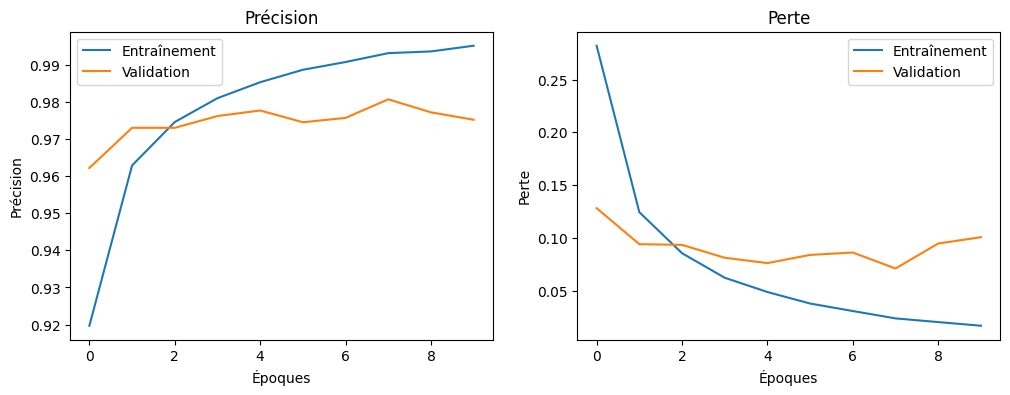

In [16]:
# Précision
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Entraînement')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Précision')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

# Perte
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Entraînement')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.show()

Observation : Les courbes montrent comment la précision et la perte évoluent au cours des époques pour les ensembles d'entraînement et de validation.

## 8. Évaluation du Modèle
Après l'entraînement, nous évaluons les performances du modèle sur le dataset de test.

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Précision sur le dataset de test:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9683 - loss: 0.1252
Précision sur le dataset de test: 0.9729999899864197


Observation : La précision sur le dataset de test nous donne une indication de la capacité du modèle à généraliser sur des données non vues.

**Visualisation des Prédictions**

Affichons quelques images du dataset de test avec les prédictions du modèle.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


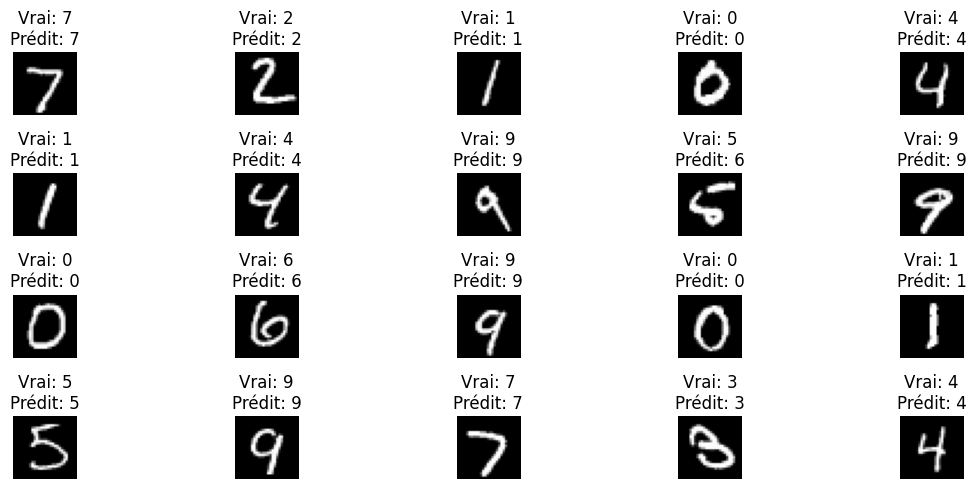

In [18]:
# Prédictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Affichage
plt.figure(figsize=(12,5))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title('Vrai: %d\nPrédit: %d' % (y_true[i], y_pred_classes[i]))
    plt.axis('off')
plt.tight_layout()
plt.show()

Nous pouvons voir que le modèle fait généralement de bonnes prédictions, mais il peut y avoir des erreurs.

## 9. Illustration du Surapprentissage (Overfitting)
Le surapprentissage se produit lorsque le modèle s'adapte trop aux données d'entraînement, capturant le bruit et les détails spécifiques, ce qui entraîne une mauvaise performance sur les données de test.

### 9.1 Création d'un Modèle Complexe pour Illustrer le Surapprentissage
Nous allons créer un modèle plus complexe avec plusieurs couches cachées et un grand nombre de neurones, et l'entraîner pendant un plus grand nombre d'époques.

In [19]:
# Modèle complexe
model_overfit = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilation du modèle
model_overfit.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Entraînement du Modèle sur un Nombre Élevé d'Époques**

Nous entraînons le modèle pendant 30 époques pour observer le surapprentissage.

In [20]:
history_overfit = model_overfit.fit(X_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8839 - loss: 0.3845 - val_accuracy: 0.9673 - val_loss: 0.1076
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9699 - loss: 0.0958 - val_accuracy: 0.9750 - val_loss: 0.0822
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9802 - loss: 0.0663 - val_accuracy: 0.9698 - val_loss: 0.1028
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9836 - loss: 0.0528 - val_accuracy: 0.9728 - val_loss: 0.0899
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9873 - loss: 0.0396 - val_accuracy: 0.9773 - val_loss: 0.0844
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9882 - loss: 0.0400 - val_accuracy: 0.9778 - val_loss: 0.0869
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9911 - loss: 0.0285 - val_accuracy: 0.9812 - val_loss: 0.0767
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9929 -


**Visualisation des Courbes d'Apprentissage**

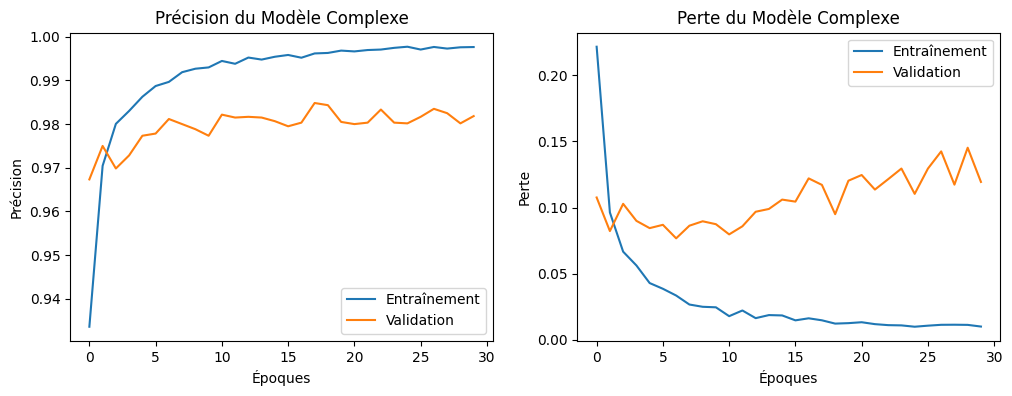

In [21]:
# Précision
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_overfit.history['accuracy'], label='Entraînement')
plt.plot(history_overfit.history['val_accuracy'], label='Validation')
plt.title('Précision du Modèle Complexe')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

# Perte
plt.subplot(1,2,2)
plt.plot(history_overfit.history['loss'], label='Entraînement')
plt.plot(history_overfit.history['val_loss'], label='Validation')
plt.title('Perte du Modèle Complexe')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.show()

Nous pouvons observer que la perte d'entraînement continue de diminuer, tandis que la perte de validation commence à augmenter après un certain nombre d'époques. De même, la précision d'entraînement augmente tandis que la précision de validation stagne ou diminue. Cela indique que le modèle est en train de surapprendre.

**Évaluation du Modèle sur le Dataset de Test**

In [22]:
test_loss_overfit, test_acc_overfit = model_overfit.evaluate(X_test, y_test)
print('Précision du modèle complexe sur le dataset de test:', test_acc_overfit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9794 - loss: 0.1545
Précision du modèle complexe sur le dataset de test: 0.9817000031471252


Malgré une précision élevée sur l'ensemble d'entraînement, le modèle n'obtient pas nécessairement une meilleure précision sur le dataset de test en raison du surapprentissage.

## 10. Correction du Surapprentissage (Overfitting)
Pour corriger le surapprentissage observé, nous pouvons appliquer plusieurs techniques.

### 10.1 Utilisation de Dropout
Le Dropout désactive aléatoirement une proportion de neurones pendant l'entraînement, ce qui force le réseau à apprendre des caractéristiques plus robustes.

In [23]:
# Modèle avec Dropout
model_dropout = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history_dropout = model_dropout.fit(X_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.6042 - loss: 1.1714 - val_accuracy: 0.9620 - val_loss: 0.1430
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9180 - loss: 0.3389 - val_accuracy: 0.9660 - val_loss: 0.1217
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9343 - loss: 0.2753 - val_accuracy: 0.9722 - val_loss: 0.0999
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9445 - loss: 0.2317 - val_accuracy: 0.9767 - val_loss: 0.0868
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9502 - loss: 0.2059 - val_accuracy: 0.9778 - val_loss: 0.0807
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9535 - loss: 0.2009 - val_accuracy: 0.9772 - val_loss: 0.0856
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9580 - loss: 0.1793 - val_accuracy: 0.9775 - val_loss: 0.0865
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9589 -

Observation : En appliquant le Dropout, nous espérons réduire le surapprentissage en empêchant les neurones de devenir trop spécialisés.

### 10.2 Early Stopping
L'Early Stopping arrête l'entraînement lorsque la performance sur l'ensemble de validation cesse de s'améliorer.

In [24]:
# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Modèle avec Early Stopping
model_early_stop = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_early_stop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history_early_stop = model_early_stop.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[early_stop])

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8832 - loss: 0.3751 - val_accuracy: 0.9687 - val_loss: 0.1075
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9700 - loss: 0.0995 - val_accuracy: 0.9748 - val_loss: 0.0890
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9794 - loss: 0.0666 - val_accuracy: 0.9800 - val_loss: 0.0687
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9836 - loss: 0.0523 - val_accuracy: 0.9762 - val_loss: 0.0857
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9877 - loss: 0.0419 - val_accuracy: 0.9788 - val_loss: 0.0776
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9889 - loss: 0.0364 - val_accuracy: 0.9818 - val_loss: 0.0699


Observation : Le modèle s'arrêtera automatiquement si la perte de validation ne s'améliore pas après 3 époques consécutives.

### 10.3 Régularisation L2
La régularisation L2 ajoute une pénalité proportionnelle au carré des poids, ce qui décourage les poids excessivement grands.

In [25]:
# Modèle avec Régularisation L2
model_l2 = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(10, activation='softmax')
])

model_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history_l2 = model_l2.fit(X_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8852 - loss: 0.9517 - val_accuracy: 0.9715 - val_loss: 0.3436
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9556 - loss: 0.3664 - val_accuracy: 0.9718 - val_loss: 0.2702
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9653 - loss: 0.2808 - val_accuracy: 0.9728 - val_loss: 0.2373
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9648 - loss: 0.2571 - val_accuracy: 0.9735 - val_loss: 0.2220
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9703 - loss: 0.2322 - val_accuracy: 0.9723 - val_loss: 0.2186
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9709 - loss: 0.2207 - val_accuracy: 0.9723 - val_loss: 0.2123
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9731 - loss: 0.2079 - val_accuracy: 0.9727 - val_loss: 0.2144
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9749 -

Observation : La régularisation L2 aide à prévenir le surapprentissage en pénalisant les poids élevés.

**Comparaison des Modèles après Correction du Surapprentissage**


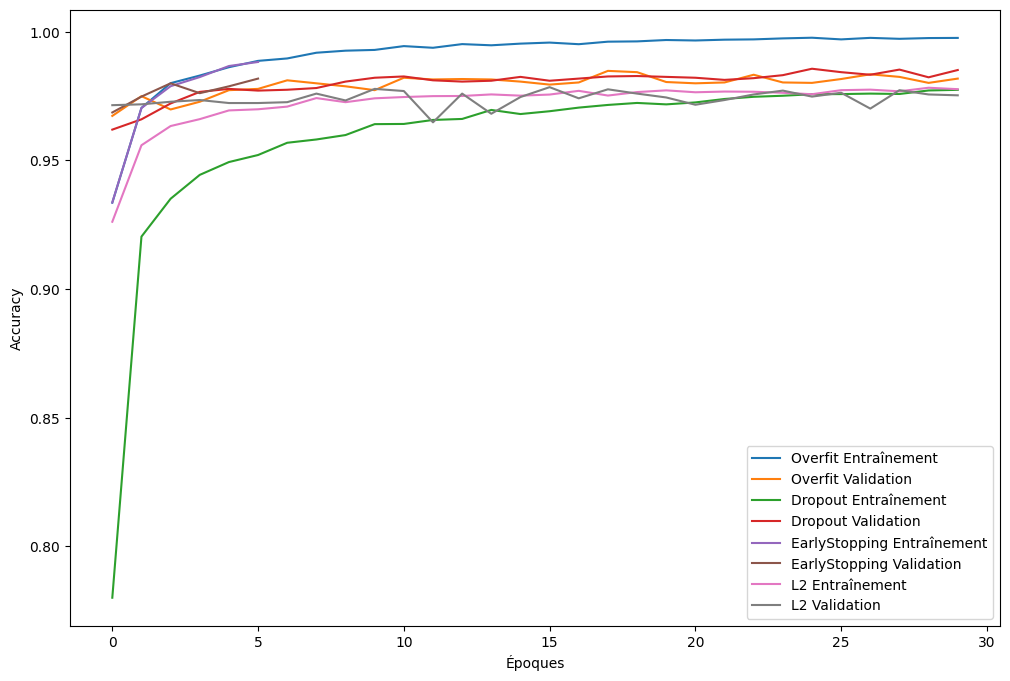

In [26]:
# Fonction pour tracer les courbes
def plot_histories(histories, key='accuracy'):
    plt.figure(figsize=(12,8))

    for name, history in histories:
        plt.plot(history.history[key], label=f'{name} Entraînement')
        plt.plot(history.history['val_'+key], label=f'{name} Validation')

    plt.xlabel('Époques')
    plt.ylabel(key.capitalize())
    plt.legend()
    plt.show()

# Tracer les précisions
histories = [('Overfit', history_overfit), ('Dropout', history_dropout), ('EarlyStopping', history_early_stop), ('L2', history_l2)]
plot_histories(histories, key='accuracy')

Observation : En comparant les courbes, nous pouvons voir que les techniques appliquées aident à réduire le surapprentissage, en améliorant la performance sur l'ensemble de validation.

**Évaluation des Modèles sur le Dataset de Test**

In [27]:
# Évaluation des modèles
models = [('Overfit', model_overfit), ('Dropout', model_dropout), ('EarlyStopping', model_early_stop), ('L2', model_l2)]
for name, m in models:
    loss, acc = m.evaluate(X_test, y_test, verbose=0)
    print(f'Précision du modèle {name} sur le dataset de test: {acc}')

Précision du modèle Overfit sur le dataset de test: 0.9817000031471252
Précision du modèle Dropout sur le dataset de test: 0.982699990272522
Précision du modèle EarlyStopping sur le dataset de test: 0.9819999933242798
Précision du modèle L2 sur le dataset de test: 0.9675999879837036


Observation : Les modèles corrigés du surapprentissage obtiennent généralement de meilleures performances sur le dataset de test que le modèle initial surappris.

## 11. Sous-apprentissage (Underfitting)
Le sous-apprentissage se produit lorsque le modèle est trop simple pour capturer les relations sous-jacentes dans les données. Cela entraîne de mauvaises performances à la fois sur les données d'entraînement et de test.

### 11.1 Création d'un Modèle Simple pour Illustrer le Sous-apprentissage
Nous allons créer un modèle très simple avec une seule couche cachée de peu de neurones.

In [28]:
# Modèle simple
model_underfit = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilation du modèle
model_underfit.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Nous entraînons le modèle pendant 10 époques.

In [29]:
history_underfit = model_underfit.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7953 - loss: 0.7286 - val_accuracy: 0.9365 - val_loss: 0.2323
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9211 - loss: 0.2748 - val_accuracy: 0.9435 - val_loss: 0.2051
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9338 - loss: 0.2326 - val_accuracy: 0.9502 - val_loss: 0.1818
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9409 - loss: 0.2069 - val_accuracy: 0.9525 - val_loss: 0.1744
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9469 - loss: 0.1874 - val_accuracy: 0.9562 - val_loss: 0.1650
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9473 - loss: 0.1828 - val_accuracy: 0.9537 - val_loss: 0.1651
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9517 - loss: 0.1699 - val_accuracy: 0.9558 - val_loss: 0.1551
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9540 - loss: 0.1595 - 

Observation : Étant donné la simplicité du modèle, il se peut qu'il ne parvienne pas à bien apprendre les caractéristiques des données.

**Visualisation des Courbes d'Apprentissage**

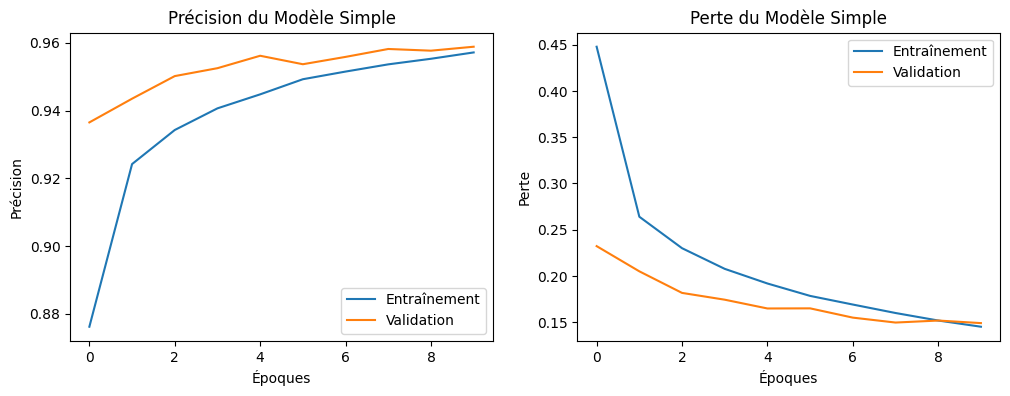

In [30]:
# Précision
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_underfit.history['accuracy'], label='Entraînement')
plt.plot(history_underfit.history['val_accuracy'], label='Validation')
plt.title('Précision du Modèle Simple')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

# Perte
plt.subplot(1,2,2)
plt.plot(history_underfit.history['loss'], label='Entraînement')
plt.plot(history_underfit.history['val_loss'], label='Validation')
plt.title('Perte du Modèle Simple')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.show()

Observation : Nous pouvons observer que la précision est faible à la fois sur l'ensemble d'entraînement et de validation, et que la perte reste élevée, indiquant un sous-apprentissage.

**Évaluation du Modèle sur le Dataset de Test**

In [31]:
test_loss_underfit, test_acc_underfit = model_underfit.evaluate(X_test, y_test)
print('Précision du modèle sous-appris sur le dataset de test:', test_acc_underfit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9404 - loss: 0.1992
Précision du modèle sous-appris sur le dataset de test: 0.9483000040054321


Observation : La précision sur le dataset de test est également faible, confirmant que le modèle est sous-appris.

**Correction du Sous-apprentissage**

Pour corriger le sous-apprentissage, nous pouvons :

- Augmenter la complexité du modèle en ajoutant plus de couches ou de neurones.
- Entraîner le modèle plus longtemps pour permettre une meilleure convergence.

**Modèle Amélioré**

In [32]:
# Modèle amélioré
model_improved = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilation du modèle
model_improved.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history_improved = model_improved.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8722 - loss: 0.4454 - val_accuracy: 0.9663 - val_loss: 0.1145
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9637 - loss: 0.1162 - val_accuracy: 0.9750 - val_loss: 0.0852
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9759 - loss: 0.0751 - val_accuracy: 0.9712 - val_loss: 0.0943
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9820 - loss: 0.0572 - val_accuracy: 0.9760 - val_loss: 0.0828
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9871 - loss: 0.0404 - val_accuracy: 0.9770 - val_loss: 0.0898
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9885 - loss: 0.0344 - val_accuracy: 0.9753 - val_loss: 0.0821
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9891 - loss: 0.0299 - val_accuracy: 0.9785 - val_loss: 0.0836
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9932 - loss: 0.0213

Observation : En augmentant la complexité du modèle, nous espérons améliorer sa capacité à apprendre les caractéristiques des données.

**Visualisation des Courbes d'Apprentissage du Modèle Amélioré**

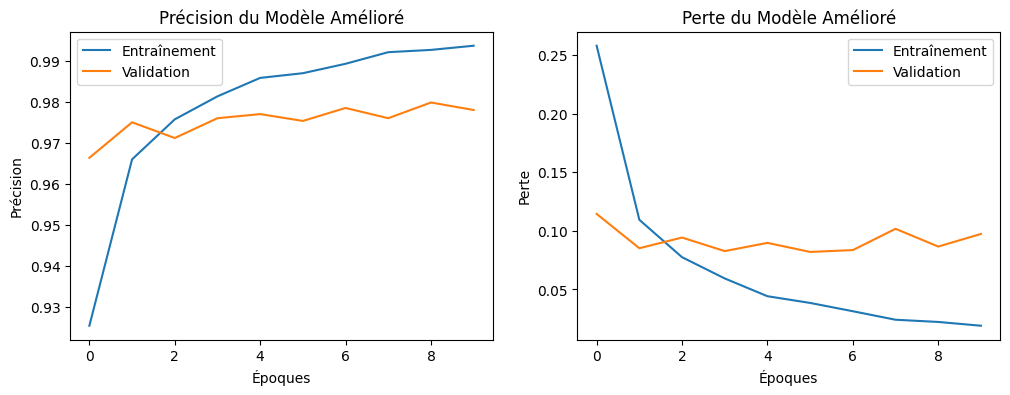

In [33]:
# Précision
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_improved.history['accuracy'], label='Entraînement')
plt.plot(history_improved.history['val_accuracy'], label='Validation')
plt.title('Précision du Modèle Amélioré')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

# Perte
plt.subplot(1,2,2)
plt.plot(history_improved.history['loss'], label='Entraînement')
plt.plot(history_improved.history['val_loss'], label='Validation')
plt.title('Perte du Modèle Amélioré')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.show()

Observation : Les courbes montrent une meilleure performance que le modèle sous-appris, indiquant que l'augmentation de la complexité a aidé.

**Évaluation du Modèle Amélioré sur le Dataset de Test**

In [34]:
test_loss_improved, test_acc_improved = model_improved.evaluate(X_test, y_test)
print('Précision du modèle amélioré sur le dataset de test:', test_acc_improved)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.1239
Précision du modèle amélioré sur le dataset de test: 0.9768999814987183


La précision sur le dataset de test est significativement meilleure que celle du modèle sous-appris.

## 12. Expérimentation avec Différentes Architectures de Réseaux

Le nombre de couches et de neurones dans un réseau affecte grandement sa capacité à apprendre des représentations complexes.

**Comparaison des Performances des Modèles**

In [35]:
# Évaluation des modèles
models = [
    ('Sous-apprentissage', model_underfit),
    ('Base', model),
    ('Amélioré', model_improved),
    ('Complexe (Overfit)', model_overfit)
]

for name, m in models:
    loss, acc = m.evaluate(X_test, y_test, verbose=0)
    print(f'Précision du modèle {name} sur le dataset de test: {acc}')


Précision du modèle Sous-apprentissage sur le dataset de test: 0.9483000040054321
Précision du modèle Base sur le dataset de test: 0.9729999899864197
Précision du modèle Amélioré sur le dataset de test: 0.9768999814987183
Précision du modèle Complexe (Overfit) sur le dataset de test: 0.9817000031471252


En comparant les précisions, nous pouvons voir comment la complexité du modèle affecte ses performances. Un modèle trop simple sous-apprend, un modèle trop complexe peut surapprendre.

## Conclusion
Dans ce notebook, nous avons :

- Exploré la structure de base d'un réseau de neurones et le processus de forward pass à travers des exemples détaillés.
- Compris l'importance du biais dans les neurones avec des exemples pratiques et des visualisations.
- Construit, entraîné et évalué un modèle simple avec Keras en utilisant le dataset MNIST.
- Visualisé les performances du modèle et les prédictions à l'aide de matplotlib.
- Illustré le surapprentissage (overfitting) en entraînant un modèle complexe sur un grand nombre d'époques, et observé la divergence entre les pertes d'entraînement et de validation.
- Découvert des méthodes pour corriger le surapprentissage, telles que le Dropout, l'Early Stopping et la Régularisation L2, en les appliquant et en comparant les résultats.
- Illustré le sous-apprentissage (underfitting) en entraînant un modèle trop simple, et appris comment augmenter la complexité du modèle pour corriger cela.
- Expérimenté avec différentes architectures de réseaux en modifiant le nombre de couches cachées et de neurones, et analysé l'impact sur les performances.